## **Урок 8. Дисперсионный анализ. Логистическая регрессия**


#### Задача 1. Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых 
#### футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: 
#### Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.
####  Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [43]:
import numpy as np
from scipy import stats

In [44]:
#stats.f_oneway?

In [45]:
#футболисты
y1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])

In [46]:
#xоккеисты
y2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])

In [47]:
#штангисты
y3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

$$H_0: \mu1 = \mu2 = \mu3$$
$$H_1: \mu1  \neq  \mu2; \:  \mu1  \neq  \mu3; \:  \mu2  \neq  \mu3 $$
$$ \alpha = 5\%$$

In [48]:
stats.f_oneway(y1, y2, y3)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

In [49]:
#Так как p-value получилось 0.010482206918698694 < 0.05, то делаем вывод, что верна H1 гипотеза.
#Проверим с помощью табличного критерия Фишера. 
#Найдем степени свободы
#𝑑𝑓_1 = р − 1
#𝑑𝑓_2 = 𝑛 − р
df_1 = 3 - 1
df_1

2

In [50]:
#𝑑𝑓_2 = 𝑛 − р
df_2 = (len(y1) + len(y2) + len(y3)) - 3
df_2

25

[Значение критерия Фишера пр уровне значимости Р=0,05](https://www.geokniga.org/geowiki/%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D1%8F-%D1%84%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [51]:
#Найдем табличный критерий Фишера
F_n = 5.500053450812596
F_t = 3.38
F_n > F_t

True

#### Ответ: гипотеза H1 верна при α=0,05. Обнаржены различия среднего роста среди взрослых футболистов, хоккеистов и штангистов (различие между выборками существено). 

Посчитаем критерий Фишера в ручную:
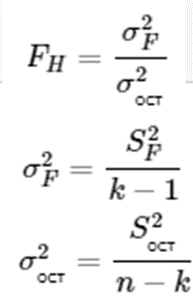

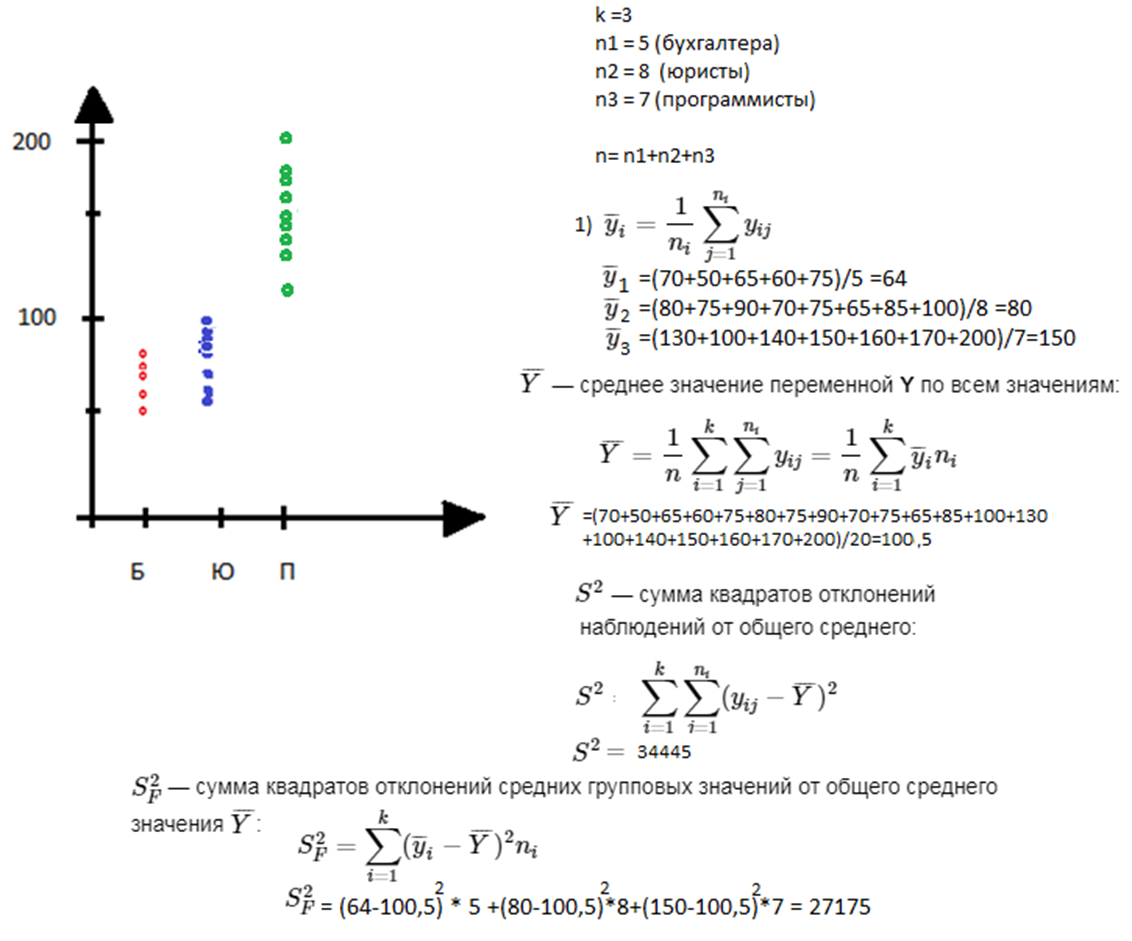

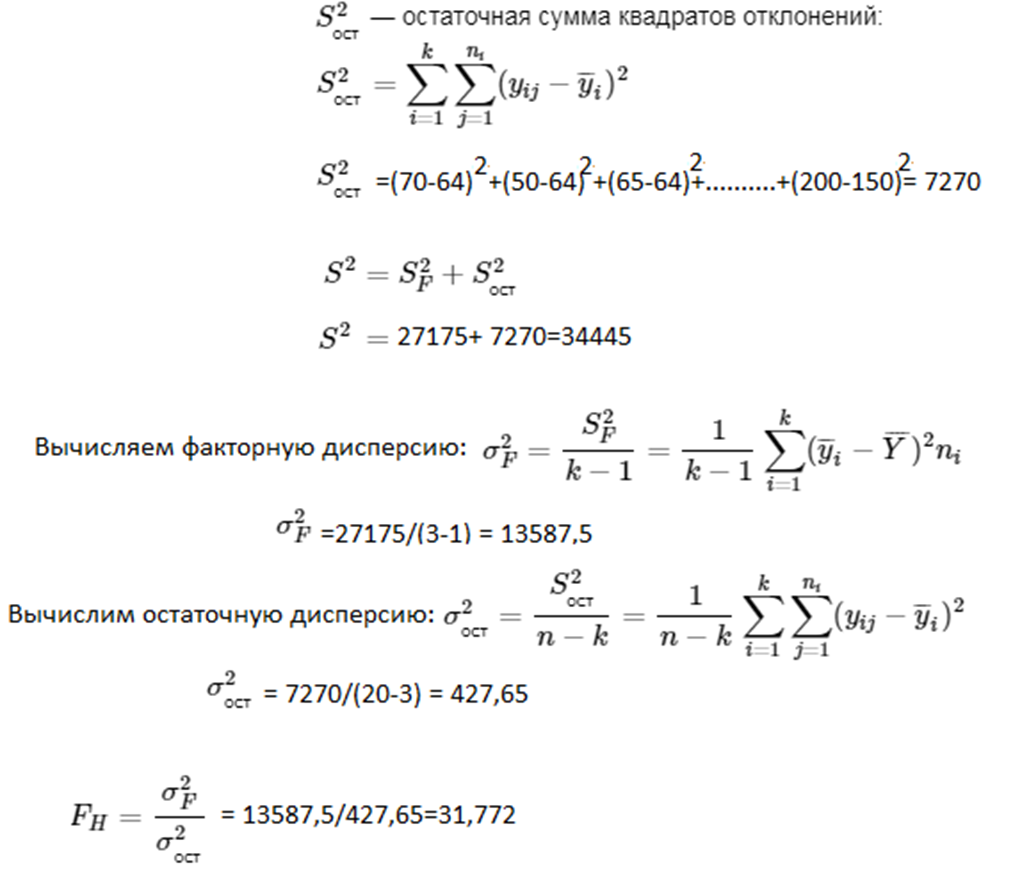

In [52]:
k = 3
n1 = len(y1)
n2 = len(y2)
n3 = len(y3)
n = n1 + n2 + n3
n

28

In [53]:
y1_mean = np.mean(y1)
y1_mean

179.125

In [54]:
y2_mean = np.mean(y2)
y2_mean

178.66666666666666

In [55]:
y3_mean = np.mean(y3)
y3_mean

172.72727272727272

In [56]:
Y = np.hstack((y1, y2, y3))
Y

array([173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177,
       172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172,
       166, 170])

In [57]:
len(Y)

28

In [58]:
Y_mean = np.mean(Y)
Y_mean

176.46428571428572

In [59]:
S_2 = np.sum((Y - Y_mean) ** 2)
S_2

830.9642857142854

In [60]:
#факторная сумма квадратных отклонений
S_2_F = ((y1_mean - Y_mean) ** 2) * n1  + ((y2_mean - Y_mean) ** 2) * n2 + ((y3_mean - Y_mean) ** 2) * n3
S_2_F

253.9074675324678

In [61]:
#остаточная сумма квадратных отклонений
S_2_R = np.sum((y1 - y1_mean) ** 2) + np.sum((y2 - y2_mean) ** 2) + np.sum((y3 - y3_mean) ** 2) 
S_2_R 

577.0568181818182

In [62]:
#факторная дисперсия
var_F = S_2_F / (k - 1)
var_F 

126.9537337662339

In [63]:
#остаточная дисперсия
var_R = S_2_R / (n - k)
var_R

23.08227272727273

In [64]:
F_n = var_F / var_R
F_n 

5.500053450812598

In [65]:
#табличный критерий Фишера
F_t = 3.38
F_n > F_t

True

#### Ответ: гипотеза H1 верна при α=0,05. Обнаржены различия среднего роста среди взрослых футболистов, хоккеистов и штангистов (различие между выборками существено). 